In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer


One_hotEncoder = OneHotEncoder()


In [2]:
data = pd.read_csv("../housing.csv")
data.head()
data.info()
# data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
data.dropna(subset=["total_bedrooms"] , inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
one_hot_encoder = OneHotEncoder()

# Fit and transform categorical column
encoded_ocean_proximity = one_hot_encoder.fit_transform(data[["ocean_proximity"]]).toarray()

# Convert to DataFrame
encoded_ocean_proximity_df = pd.DataFrame(
    encoded_ocean_proximity,
    columns=one_hot_encoder.get_feature_names_out(["ocean_proximity"]),
    index=data.index
)

# Merge back (drop original)
data_encoded = pd.concat([data.drop(columns=["ocean_proximity"]), encoded_ocean_proximity_df], axis=1)

print(data_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1   

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd

data_scaled = data_encoded.copy()

# StandardScaler for age + income
std_scaler = StandardScaler()
data_scaled[["housing_median_age", "median_income"]] = std_scaler.fit_transform(
    data_scaled[["housing_median_age", "median_income"]]
)

# RobustScaler for skewed big numbers
robust_scaler = RobustScaler()
data_scaled[["total_rooms", "total_bedrooms", "population", "households"]] = robust_scaler.fit_transform(
    data_scaled[["total_rooms", "total_bedrooms", "population", "households"]]
)

# MinMaxScaler for geo-coordinates
minmax_scaler = MinMaxScaler()
data_scaled[["longitude", "latitude"]] = minmax_scaler.fit_transform(
    data_scaled[["longitude", "latitude"]]
)

print(data_scaled.head())



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.982163    -0.736562       -0.871795   
1   0.212151  0.565356           -0.606210     2.936799        1.911681   
2   0.210159  0.564293            1.855769    -0.389841       -0.698006   
3   0.209163  0.564293            1.855769    -0.503839       -0.569801   
4   0.209163  0.564293            1.855769    -0.295334       -0.441595   

   population  households  median_income  median_house_value  \
0   -0.902674   -0.873457       2.345163            452600.0   
1    1.320856    2.250000       2.332632            358500.0   
2   -0.716578   -0.716049       1.782939            352100.0   
3   -0.650267   -0.586420       0.932970            341300.0   
4   -0.642781   -0.462963      -0.013143            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1   

In [6]:
x= data_scaled.drop(columns=["median_house_value"])
y = data_scaled["median_house_value"]

In [7]:
x_train, X_test, y_train, y_test = train_test_split( x , y , random_state=42, test_size=0.4)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
lin_reg = LinearRegression()

# Train model
lin_reg.fit(x_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 4542709631.994277
RMSE: 67399.6263490702
R² Score: 0.6545797167818916


Random Forest MSE: 2834162272.827589
Random Forest RMSE: 53236.850703507895
Random Forest R² Score: 0.7844948908749849


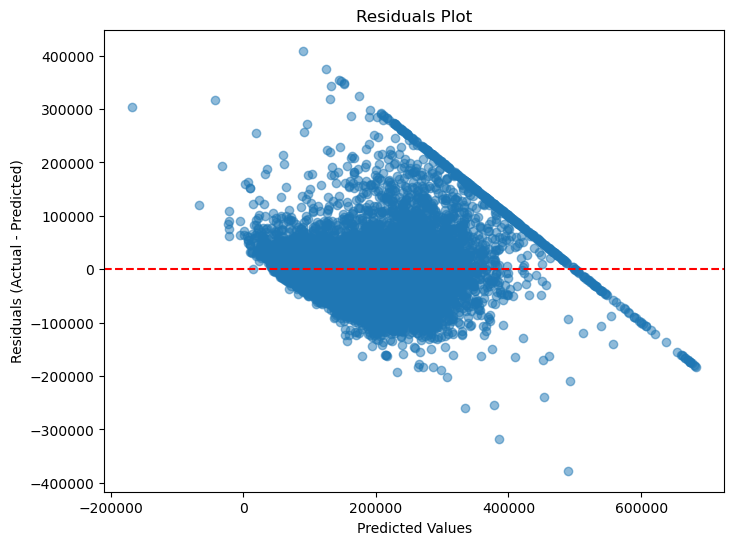

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=10, max_features=4,  random_state=42)
rf_regressor.fit(x_train,y_train)
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)   
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)   
print("Random Forest R² Score:", r2_rf)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
pram_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
rf_r = RandomForestRegressor()
grid_search = GridSearchCV(rf_r, param_grid=pram_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1 , return_train_score=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [24]:
grid_search.best_params_
grid_search.best_estimator_


RandomForestRegressor(max_features=4, n_estimators=30)

In [25]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65256.91685549465 {'max_features': 2, 'n_estimators': 3}
56141.09497976849 {'max_features': 2, 'n_estimators': 10}
53882.454043362035 {'max_features': 2, 'n_estimators': 30}
61880.29941580955 {'max_features': 4, 'n_estimators': 3}
53718.876652125204 {'max_features': 4, 'n_estimators': 10}
51437.423609993995 {'max_features': 4, 'n_estimators': 30}
59315.0542624362 {'max_features': 6, 'n_estimators': 3}
53313.543715454645 {'max_features': 6, 'n_estimators': 10}
51445.79481498742 {'max_features': 6, 'n_estimators': 30}
60154.436849668855 {'max_features': 8, 'n_estimators': 3}
53602.88660657654 {'max_features': 8, 'n_estimators': 10}
51534.359231858296 {'max_features': 8, 'n_estimators': 30}
63548.85616024417 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54919.33884672957 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61307.09655492803 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54029.90716123368 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [26]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.25152741e-01, 1.01686287e-01, 4.94398184e-02, 4.51493613e-02,
       3.53342139e-02, 5.20284279e-02, 3.34090872e-02, 3.82549197e-01,
       2.78441706e-02, 1.28681724e-01, 1.84961142e-04, 3.87557736e-03,
       1.46644334e-02])

In [17]:
data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler , StandardScaler , OneHotEncoder

minmax_scaler_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                  'total_bedrooms', 'population', 'households', 'median_income']

categorical_cols_onehot = ['ocean_proximity']
CT = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
ct = ColumnTransformer(
    transformers=[
        ("minmax_scaler", MinMaxScaler(), minmax_scaler_cols),
        ("one_hot_encoder",OneHotEncoder(), categorical_cols_onehot)
    ]
)


In [18]:
pipe = Pipeline(
    steps=[
        ("column_transformer" ,ct ),
        ("LinearRegression" , LinearRegression())
    ]
)
x= data.drop(columns=["median_house_value"])
y = data["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=42
)

# ------------------------------
# Fit and predict
# ------------------------------
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# ------------------------------
# Evaluation
# ------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Pipeline MSE:", mse)
print("Pipeline RMSE:", rmse)
print("Pipeline R² Score:", r2)


Pipeline MSE: 4542709631.994281
Pipeline RMSE: 67399.62634907023
Pipeline R² Score: 0.6545797167818913
